In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [54]:
bottom_tier = pd.read_csv("BottomTierHomeValues.csv")
bottom_tier.head()

,Unnamed: 0,RegionName,City,State,InitialValue,FinalValue,Percent Change
0,624,Midtown,Atlanta,GA,238817,323293,35.372691
1,767,Downtown,Atlanta,GA,163686,228871,39.823198
2,1077,Old Fourth Ward,Atlanta,GA,206508,317833,53.908323
3,1726,Pine Hills,Atlanta,GA,216510,296854,37.108679
4,2881,Lindbergh,Atlanta,GA,180296,264867,46.906753


In [40]:
# x_axis = bottom_tier["RegionName"]
pc = bottom_tier["Percent Change"]
# percent_change=plt.bar(x_axis,y_axis)

In [41]:
# x_axis = bottom_tier["RegionName"]
iv = bottom_tier["InitialValue"]
# initial_value=plt.bar(x_axis,iv)

In [42]:
# x_axis = bottom_tier["RegionName"]
fv = bottom_tier["FinalValue"]
# final_value=plt.bar(x_axis,fv)

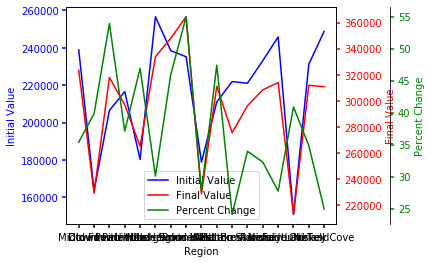

In [45]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

x_axis = bottom_tier["RegionName"]
pc = bottom_tier["Percent Change"]
iv = bottom_tier["InitialValue"]
fv = bottom_tier["FinalValue"]

fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(x_axis,iv, "b-", label="Initial Value")
p2, = par1.plot(x_axis,fv, "r-", label="Final Value")
p3, = par2.plot(x_axis,pc, "g-", label="Percent Change")


host.set_xlabel("Region")
host.set_ylabel("Initial Value")
par1.set_ylabel("Final Value")
par2.set_ylabel("Percent Change")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])

# plt.show()
plt.savefig("Percent Change of Bottom Tier")

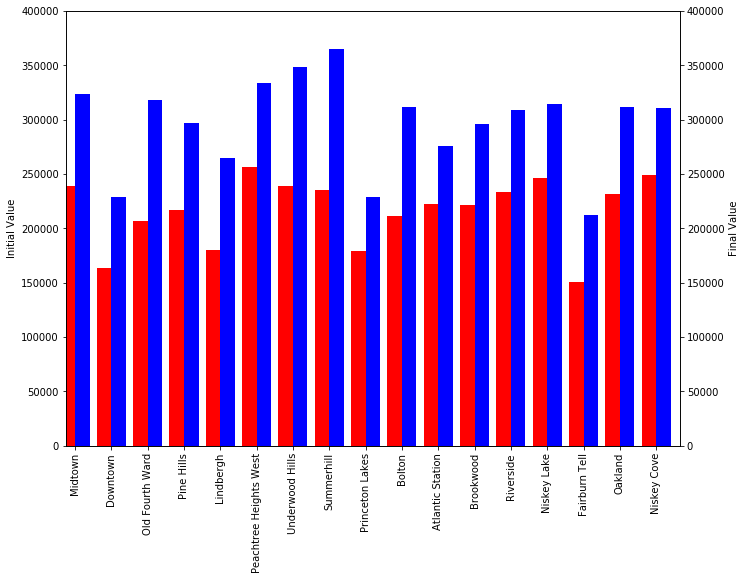

In [98]:
fig = plt.figure()
fig.set_size_inches(11,8)

ax = fig.add_subplot() 
ax2 = ax.twinx() 

width = 0.4
x_axis = bottom_tier["RegionName"]
pc = bottom_tier["Percent Change"]

bottom_tier["InitialValue"].plot(kind='bar', color='red', ax=ax, width=width, position=1)
bottom_tier["FinalValue"].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
ax.set_xticklabels(x_axis)

ax.set_ylabel('Initial Value')
ax2.set_ylabel('Final Value')
ax.set_ylim(0, 400000)
ax2.set_ylim(0, 400000)

plt.savefig("Bottom Tier Home Values")